Experiment 2: 

Run HMMM user who are on all 15 pages

In [1]:
import hmm_scaled
import os 

import pandas as pd 
import seaborn as sns 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("error", message=".*check_inverse*.",
                        category=UserWarning, append=False)

In [2]:
def generate_dic(items): 
    """ Genderates a dictionay for all values in item """
    new_dic = {}
    count = 0
    for unique in items: 
        new_dic[unique]  = count
        count +=1
    return new_dic

def column_scaler(data): 
    """
    scales each column of data 
    """
    scaler = StandardScaler()
    for value in data.columns: 
        data_sub_ = pd.DataFrame(data.loc[:,value])
        data.loc[:,value] =scaler.fit_transform(data_sub_)
    return data

def kmean_prop(data, column): 
    data_value = data.groupby(column).agg(count = pd.NamedAgg(column= column, aggfunc= 'count'))
    percentage = []
    for i in range(0, len(data_value)): 
        result = round(((data_value.iloc[i,0] / len(data)) * 100),2)
         
        percentage.append(result)
    data_value['percentage (%)'] = percentage
        
    return data_value

def PCA_Col_names(count):
    """
    Remove columns in a PCA that meets the threshold count 
    """
    colname = []
    rowname = 1
    while rowname <= count: 
        colname.append(f'Principle Component {rowname}')
        rowname += 1 
    return (colname)

In [3]:
# set working directory (Change for youe)
os.chdir('C:/Users/ander/Google Drive/Columbia/Fall 2019/Capstone/Dotin-Columbia-Castone-Team-Alpha-')
data = pd.read_csv('Models/Q1_Mouse Activity/Data/direction_data.csv')

In [4]:
# create a list with all the page number
page_number_list =[]
for value in range(1,16):
    page_ = f'page {value}'
    page_number_list.append(page_)

In [5]:
## limit page observation per page 
final_data = data[0:0]

for page in range(0,len(page_number_list)):
    observation_limit = 200
    page_subset =  data[data['Page count'] == page_number_list[page]]
    page_shrunk = page_subset[page_subset.observation <= observation_limit]
    page_ = page_shrunk.groupby('User Id').count()['observation']
    user_list = page_[page_  == observation_limit].index
    updated_dat = page_shrunk[page_shrunk['User Id'].isin(user_list)]
    final_data = pd.concat([final_data,updated_dat])    

In [6]:
for page in range(0,15):
    pages___ = final_data[final_data['Page count']== page_number_list[page]]
    user_count = len(pages___.groupby('User Id').count()['observation'])
    print(f' Page {page+1}: {user_count}')

 Page 1: 170
 Page 2: 221
 Page 3: 217
 Page 4: 206
 Page 5: 195
 Page 6: 188
 Page 7: 197
 Page 8: 194
 Page 9: 181
 Page 10: 180
 Page 11: 169
 Page 12: 151
 Page 13: 139
 Page 14: 119
 Page 15: 103


In [7]:
unique_user = set(data['User Id'])
unique_page = set(data['Page count'])

In [8]:
final_data = data
user_list = []
page_count_list = []
for user in unique_user: 
    user_list.append(user)
    num_pages_completed = len(set(data[data['User Id'] == user]['Page count']))
    page_count_list.append(num_pages_completed)

In [9]:
num_pages_user = pd.DataFrame({'User Id': user_list, 
                          'Num page': page_count_list})
num_pages_user['Num page'].value_counts()

1     212
15     66
10     39
5      36
9      35
11     32
8      31
7      31
14     29
3      29
6      27
4      25
12     24
13     23
2      22
Name: Num page, dtype: int64

In [10]:
user_completed_all_page = num_pages_user[num_pages_user['Num page'] == 15]['User Id'].values

In [11]:
data = data[data['User Id'].isin(user_completed_all_page)]

In [12]:
user_direction = data[['User Id','Page count', 'Direction']]
flatten_data = user_direction.groupby(['User Id','Page count'], as_index=False).agg(list)

user_dict = generate_dic(set(data['Direction']))

direction_numerized =[]
for row in range(0,len(flatten_data)): 
    value = flatten_data.iloc[row,2]
    numerized =[user_dict.get(key, value) for key in value]
    direction_numerized.append(numerized)
flatten_data['Direction Numerized'] = direction_numerized

page_number_list =[]
for value in range(1,16):
    page_ = f'page {value}'
    page_number_list.append(page_)

In [13]:
user_fraud_matrix = pd.DataFrame(data=0 , index=unique_user, columns=unique_page)
user_fraud_matrix

,page 11,page 3,page 13,page 15,page 2,page 7,page 6,page 8,page 5,page 12,page 1,page 10,page 9,page 14,page 4
371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
hmm= hmm_scaled.HMM(len(user_dict))

In [15]:
for count in range(0,len(page_number_list)):
    page_ = flatten_data[flatten_data['Page count'] == page_number_list[count]]
    page_= page_.set_index('User Id')
    hmm.fit(list(page_['Direction Numerized']))
    for index in user_fraud_matrix.index:
        try: 
            user_fraud_matrix.loc[index, page_number_list[count]] = hmm.log_likelihood(page_.loc[index, 'Direction Numerized'])
        except KeyError:
            continue

iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:04:48.143154
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:07:17.649615
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:08:28.965670
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:10:11.168642
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:11:09.041371
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:10:58.099595
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:10:55.912228
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:09:26.854104
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:10:35.892233
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:09:14.646031
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:10:15.344996
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:08:43.512134
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:08:38.204983
iteration: 0
iteration: 10
iteration: 20
Fit duration: 0:09:03.316400
iteration: 0
iterati

### KMeans

In [16]:
user_fraud_matrix_scaled = column_scaler(user_fraud_matrix)

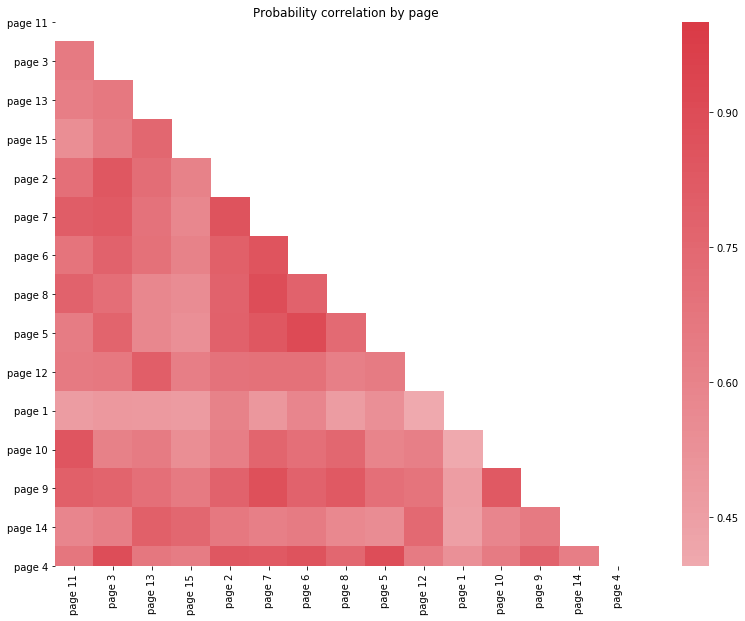

In [17]:
fig = plt.figure(figsize=(16,10))
corr = user_fraud_matrix_scaled.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True)
plt.title('Probability correlation by page')
plt.show()

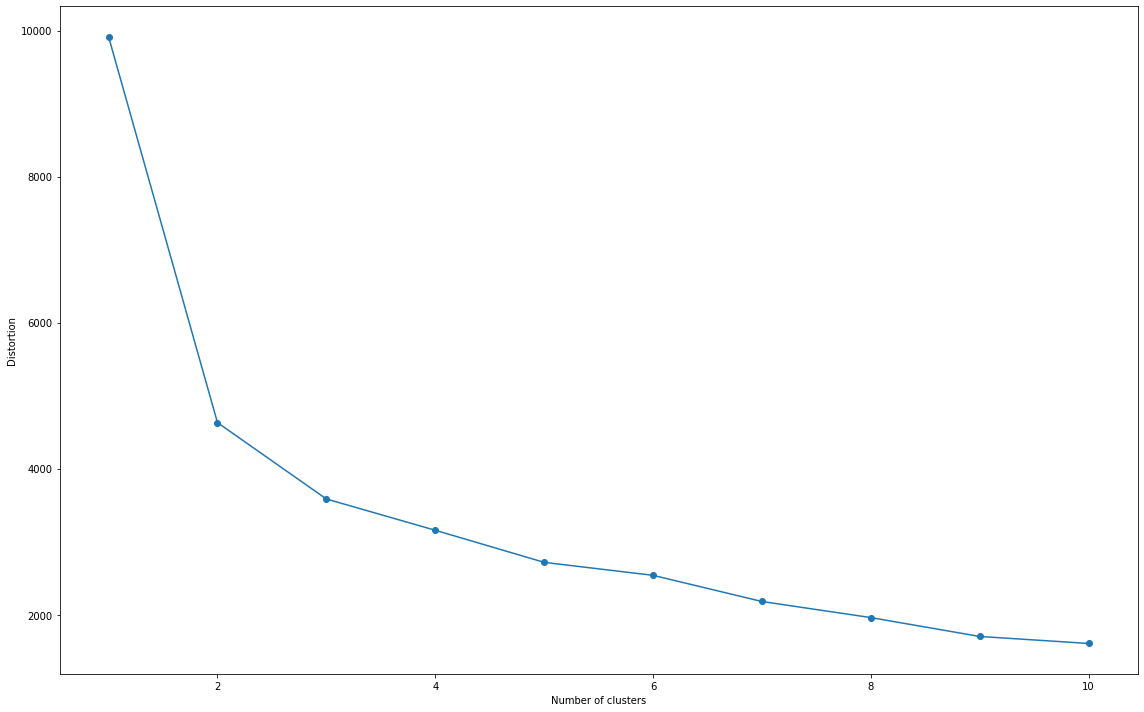

In [18]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(user_fraud_matrix_scaled)
    distortions.append(km.inertia_)

# plot
fig = plt.figure(figsize=(16,10))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [43]:
km_1 = KMeans(
    n_clusters=8, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

user_fraud_matrix_scaled['K_means']=  km_1.fit_predict(user_fraud_matrix_scaled)
K_means_ = kmean_prop(user_fraud_matrix_scaled, 'K_means')

In [48]:
user_fraud_matrix_scaled['K_means'] = np.where(user_fraud_matrix_scaled['K_means'] == 0,'Normal', "Outlier")

In [58]:
k_means_outlier = user_fraud_matrix_scaled[user_fraud_matrix_scaled['K_means'] == 'Outlier']
outlier_users_kmeans = k_means_outlier.index

In [86]:
validations = pd.read_csv('Data/validations.csv')
validations_userid_fraud = validations[validations.validation == False]['user_id']

In [97]:
len(outlier_users_kmeans[outlier_users_kmeans.isin(validations_userid_fraud)])

13

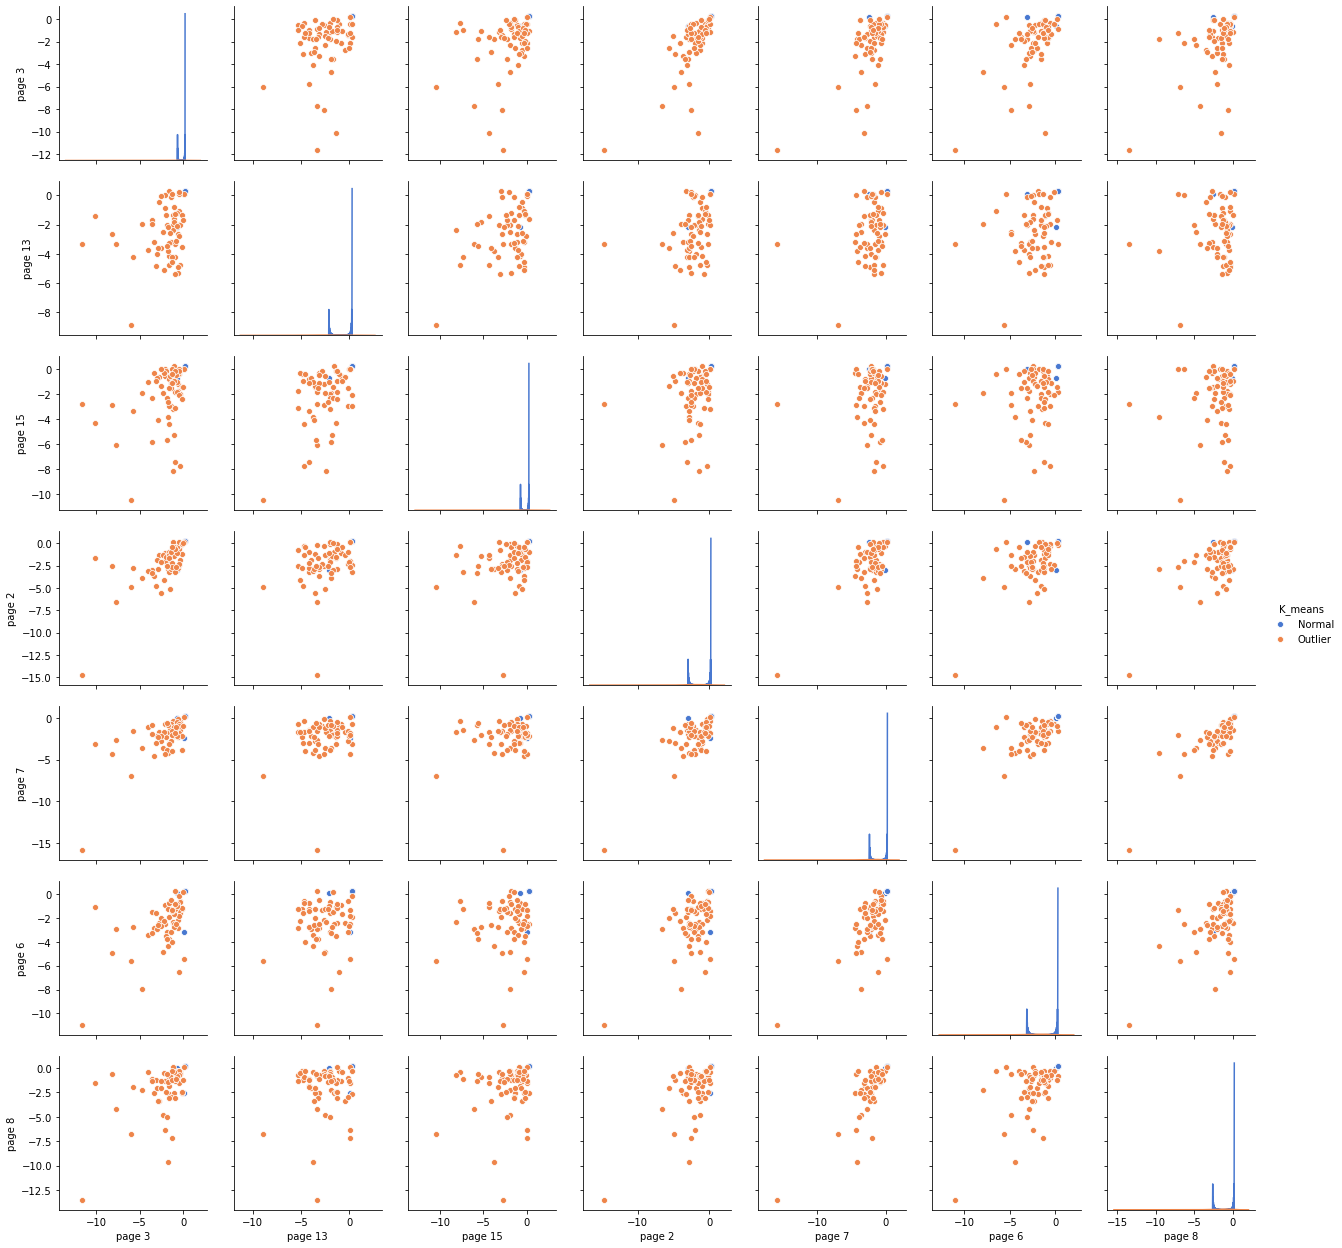

In [49]:
sns.pairplot(user_fraud_matrix_scaled.iloc[:,[1,2,3,4,5,6,7,15]], hue = 'K_means', palette='muted')

In [21]:
user_fraud_matrix_scaled = user_fraud_matrix_scaled.drop(columns=['K_means'])

In [22]:
pca = PCA()
pca_fit = pca.fit_transform(user_fraud_matrix_scaled)  

explained_ratio = pca.explained_variance_ratio_
explained_ratio = np.round(explained_ratio, 2)
np.cumsum(explained_ratio)

array([0.71, 0.78, 0.84, 0.88, 0.91, 0.93, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  , 1.01, 1.01, 1.01])

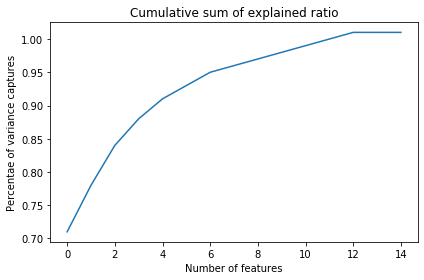

In [23]:
plt.plot(np.cumsum(explained_ratio))
plt.title('Cumulative sum of explained ratio')
plt.xlabel('Number of features')
plt.ylabel('Percentae of variance captures')
plt.tight_layout()
plt.show()

In [24]:
pca_col_names = PCA_Col_names(10)
pca = PCA(n_components=10)
pca_fit = pca.fit_transform(user_fraud_matrix_scaled)
pca_dat = pd.DataFrame(pca_fit,columns=pca_col_names)

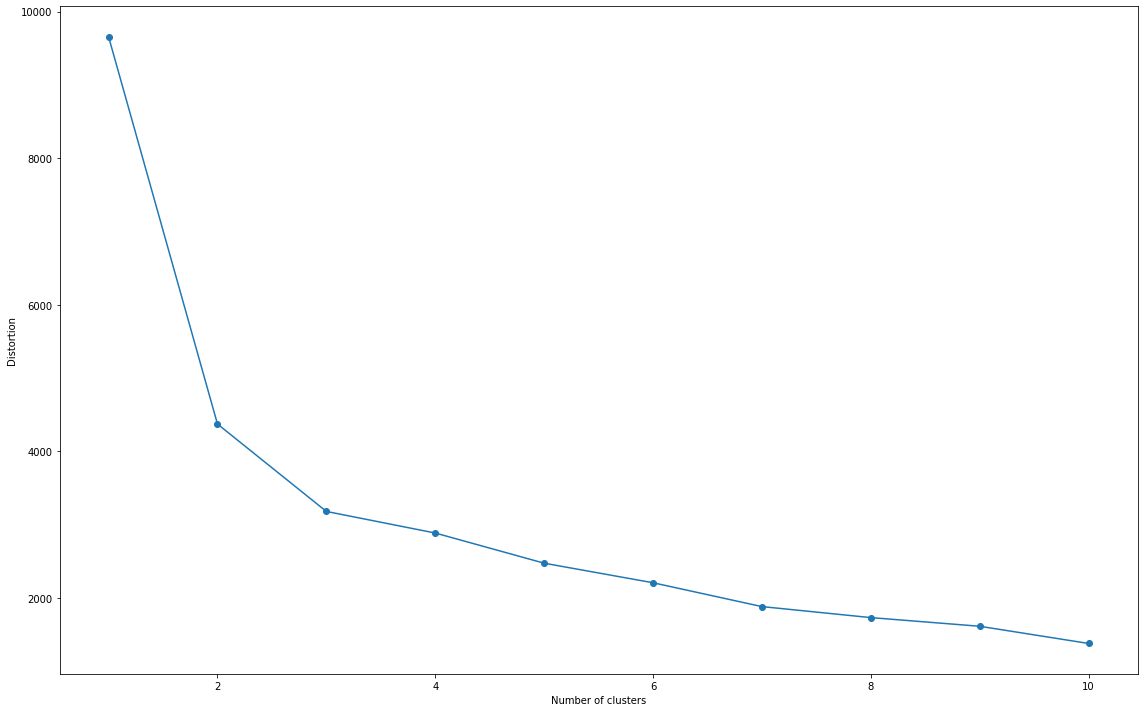

In [25]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(pca_dat)
    distortions.append(km.inertia_)

# plot
fig = plt.figure(figsize=(16,10))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [26]:
km_1 = KMeans(
    n_clusters=8, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

pca_dat['K_means']=  km_1.fit_predict(pca_dat)
kmean_prop(pca_dat, 'K_means')

,count,percentage (%)
K_means,,
0,597,90.32
1,49,7.41
2,1,0.15
3,1,0.15
4,1,0.15
5,1,0.15
6,6,0.91
7,5,0.76


C:\Users\ander\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\ander\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ander\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ander\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


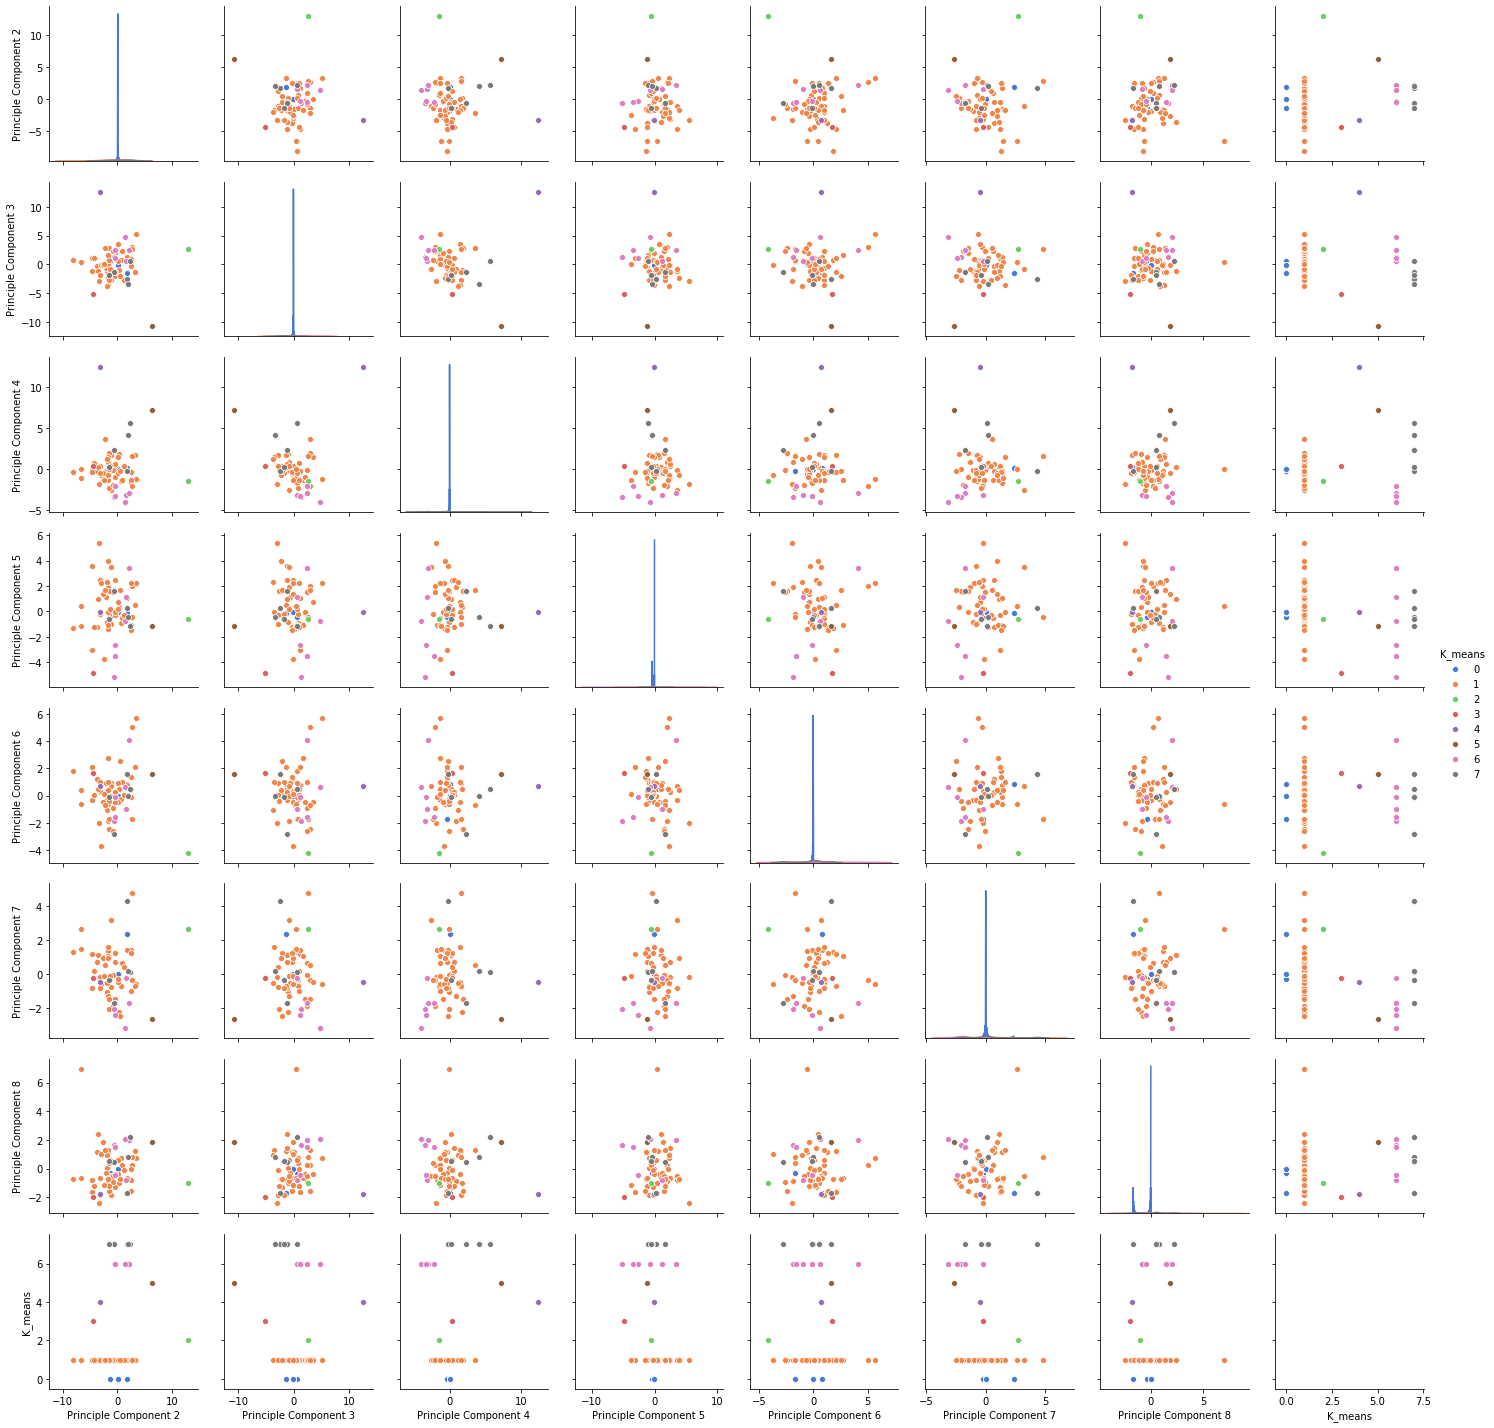

In [27]:
sns.pairplot(pca_dat.iloc[:,[1,2,3,4,5,6,7,10]], hue = 'K_means', palette='muted')

In [28]:
# Compute DBSCAN on scaled data 
scaled_db = DBSCAN(eps=0.40, min_samples=5).fit(user_fraud_matrix_scaled)
scaled_db_labels = scaled_db.labels_
len(set(scaled_db_labels))

2

In [29]:
scaled_cluster, count = np.unique(scaled_db_labels, return_counts=True)
dict(zip(scaled_cluster, count))

{-1: 66, 0: 595}

In [30]:
# consolidate outlier 
new_labels = []
for i in scaled_db_labels: 
    if i == -1: 
        new_labels.append('Normal')
    else: 
        new_labels.append('Outlier')

np.unique(new_labels, return_counts=True)        

(array(['Normal', 'Outlier'], dtype='<U7'), array([ 66, 595], dtype=int64))

In [31]:
user_fraud_matrix_scaled['DB Scan Label'] = user_fraud_matrix_scaled['DB Scan Label'] = new_labels 

C:\Users\ander\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ander\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


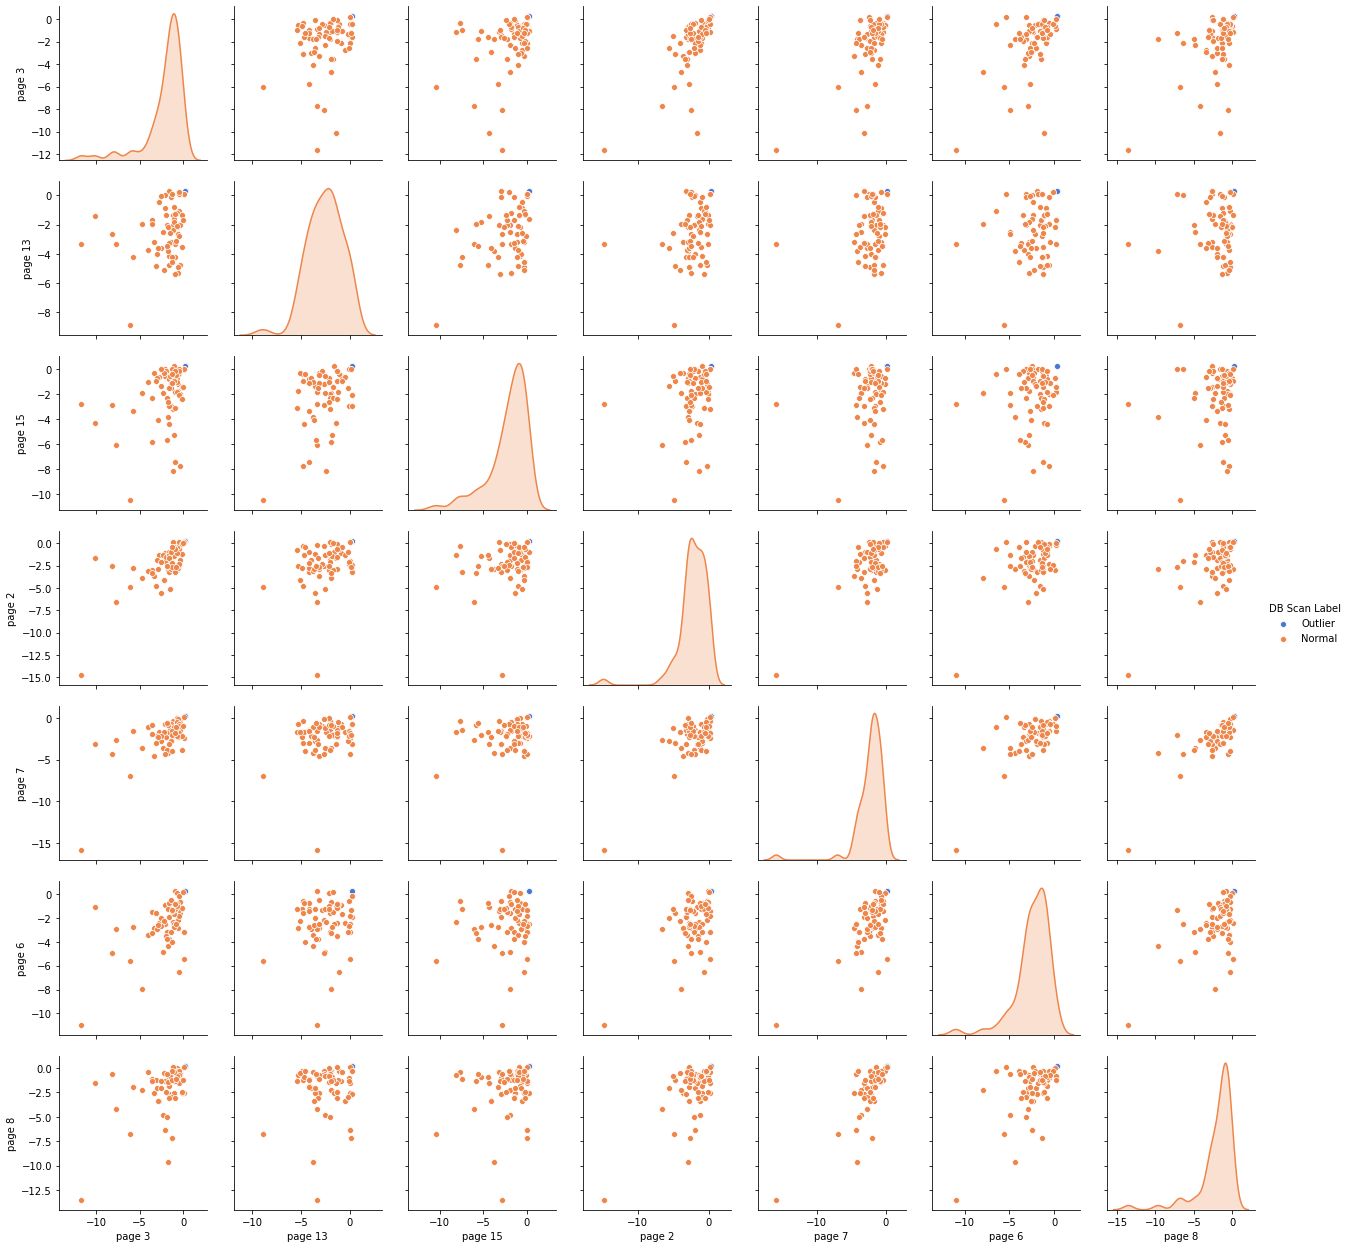

In [32]:
sns.pairplot(user_fraud_matrix_scaled.iloc[:,[1,2,3,4,5,6,7,15]], hue = 'DB Scan Label', palette='muted')